In [1]:
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
import sklearn.datasets as datasets
from sklearn.metrics import pairwise_distances
import pandas as pd

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
sns.set_context('poster')

import numpy as np

import src

In [2]:
%load_ext autoreload
%autoreload 2

### Dimension Reduction Analysis

#### Goal

Effectively assess dimension reduction quality, and make it easy for others to do so as well. 

The desired punch line: here are the best ways to assess quality of your dimension reduction based on what you want your dimension reduction to preserve (paper), and here's how to easily check yourself on your own data (codebase). This should all come in a single handy framework with an easy to use API. 

#### Tasks

* Review and reproduce results existing quality measures. Create a cohesive easy to use interface along the way for comparing high vs. low space using whatever quality measure you'd like. 
    * ***Datasets:***
        * Synthetic
        * Natural (aka. real world)
            * MNIST
            * F-MNIST
            * COIL-20
    * ***Dimension Reduction Techniques:*** Preference to techniques that are implemented in sklearn and other standard python libraries or that are otherwise widely used.
        * PCA
        * MDS
        * Isomap
        * t-SNE
        * autoencoder
        * UMAP
        * Maybe others: (try them and then see if they add anything to the overall review)
    * ***Quality measures:***
        * Stress
        * Trustworthiness
        * Continuity
        * Generalization errors of 1-NN classifiers?
        * Quality score from coranking matrix
* Include visualization options (when reducing to 2/3 dimensional space)   
* Do the same analysis adding our local neighbourhood scores
* Make
        

#### References

* [***MPH2009***](https://www.tilburguniversity.edu/upload/59afb3b8-21a5-4c78-8eb3-6510597382db_TR2009005.pdf): 2009 review of 12 dimension reduction techniques on 10 datasets (5 synthetic, 5 natural) using trustworthiness, continuity, and generalization errors of 1-NN classifiers. Techniques used were  
    * Kernel PCA, 
    * Isomap
    * Maximum Variance Unfolding
    * diffusion maps
    * Locally Linear Embedding
    * Laplacian Eigenmaps
    * Hessian LLE
    * Local Tangent Space Analysis
    * Sammon mapping
    * multilayer autoencoders
    * Locally Linear Coordination
    * manifold charting.
* [***S2015***](http://journals.sagepub.com/doi/pdf/10.1177/1473871613504102): 2015 comparison  of DR techniques on financial data using metric MDS, Sammon’s mapping, and the SOM. "Rather than being the most recent methods, the rationale for comparing these methods is to capture the suitability of well-known dimension reduction methods with inherently different aims: global and local distance preservation and topology preservation. For DDR, we test serial and parallel combinations of the projections with three data reduction or compression methods: vector quantization (VQ),16 k-means clustering,17 and Ward’s18 hierarchical clustering."
* [***LOV2015***](https://www.sciencedirect.com/science/article/pii/S0925231215003641) Use of the follow on from the quality assessment from the co-ranking metric with an algorithm that is better via that score.
* [***LV2008***](http://proceedings.mlr.press/v4/lee08a/lee08a.pdf): Trustworthiness, continuity and the coranking matrix.

#### Bibtex

    @article{MPH2009,
      title={Dimensionality reduction: a comparative review},
      author={Van Der Maaten, Laurens and Postma, Eric and Van den Herik, Jaap},
      journal={J Mach Learn Res},
      volume={10},
      pages={66--71},
      year={2009}
    } 
    
    @article{S2015,
      title={Data and dimension reduction for visual financial performance analysis},
      author={Sarlin, Peter},
      journal={Information Visualization},
      volume={14},
      number={2},
      pages={148--167},
      year={2015},
      publisher={Sage Publications Sage UK: London, England}
    }
    
    @article{LOV2015,
      title={Multi-scale similarities in stochastic neighbour embedding: Reducing dimensionality while preserving both local and global structure},
      author={Lee, John A and Peluffo-Ord{\'o}{\~n}ez, Diego H and Verleysen, Michel},
      journal={Neurocomputing},
      volume={169},
      pages={246--261},
      year={2015},
      publisher={Elsevier}
    }
    
    @inproceedings{LV2008,
      title={Quality assessment of nonlinear dimensionality reduction based on K-ary neighborhoods},
      author={Lee, John and Verleysen, Michel},
      booktitle={New Challenges for Feature Selection in Data Mining and Knowledge Discovery},
      pages={21--35},
      year={2008}
    }

### Use PCA on MNIST to get high/low data for first example

In [3]:
from sklearn.datasets import fetch_mldata
digits = fetch_mldata('MNIST original')

In [4]:
c100 = src.data.datasets.load_dataset('coil-100')

In [5]:
print(c100.DESCR)

Columbia University Image Library (COIL-100)

Notes
-----
Data Set Characteristics:
    :Number of Instances: 7200
    :Number of Attributes: 49152
    :Attribute Information: 128x128 image of 3 channels (16-bit RGB values)
    :Missing Attribute Values: None
    :Creator: Sameer A Nene, Shree K. Nayar and Hiroshi Murase
    :Date: 1995

This is a copy of the Columbia Object Image Library (COIL-100) data:
http://www.cs.columbia.edu/CAVE/databases/SLAM_coil-20_coil-100/coil-100/coil-100.zip

Columbia Object Image Library (COIL-100) is a database of color images of 100 objects.

This dataset consists of 7,200 color images of 100 objects (72 images per object) where the objects
have been placed on a motorized turntable against a black background. Images were taken at 5 degree rotations,
giving 72 images per object. The resulting images were then size and intensity-normalized.

Size normalization involved first clipping to a rectangual bounding box and resized (with aspect
ratio preserved)

In [6]:
high_labels = c100.target
high_data = c100.data

In [7]:
print(high_data.shape)

(7200, 49152)


We want to make a 'standard' sklearn dataset out of this. See https://bbengfort.github.io/programmer/2016/04/19/bunch-data-management.html for a good description of what this means


In [8]:
pca = PCA(n_components=2, svd_solver='arpack')

In [9]:
%%time
low_data = pca.fit_transform(high_data)

CPU times: user 21.6 s, sys: 7.41 s, total: 29 s
Wall time: 24.7 s


In [10]:
low_labels = high_labels

In [11]:
def two_dim_label_viz(data, labels, cmap="Blues", s=10, **kwargs):
    """
    Plot data using labels as the color scheme.
    
    Parameters
    ----------
    data: 2d np array
    labels: labels
    any other plt.scatter options
    """
    plt.scatter(data[:,0], data[:,1], c=labels, cmap=cmap, s=s, **kwargs)
    plt.colorbar();

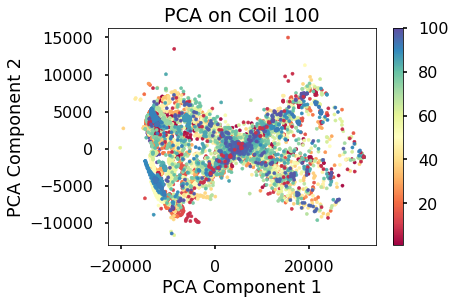

In [12]:
two_dim_label_viz(low_data, low_labels, cmap="Spectral", s=10)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA on COil 100");

### Quality score using stress

Metric MDS

$$ Stress_{D}(x_{1},x_{2},...,x_{N})={\Biggl (}\sum _{i\neq j=1,...,N}{\bigl (}d_{ij}-\|x_{i}-x_{j}\|{\bigr )}^{2}{\Biggr )}^{1/2}$$

### Proof of concept: Do not do this with large data O($N^2$)

In [13]:
%%time
high_distances = pairwise_distances(high_data, metric='euclidean')

CPU times: user 1min 38s, sys: 7 s, total: 1min 45s
Wall time: 36.2 s


In [14]:
low_distances = pairwise_distances(low_data, metric='euclidean')

In [15]:
difference_distances = high_distances-low_distances
s_difference_distances = difference_distances**2
stress = np.sqrt(np.sum(s_difference_distances))

Relative local contributions could be computed via row sums of the differences between the distances...or the sqrt of the row sums of the squared difference of the distances.

In [16]:
def pairwise_distance_difference(high_data, low_data, metric='euclidean'):
    high_distances = pairwise_distances(high_data, metric=metric)
    low_distances = pairwise_distances(low_data, metric=metric)
    difference_distances = high_distances-low_distances
    return difference_distances

In [17]:
def point_stress(difference_distances, metric='euclidean'):
    s_difference_distances = difference_distances**2
    point_stress = np.sum(s_difference_distances, axis=1)
    return point_stress

In [18]:
def stress(difference_distances, metric='euclidean'):
    s_difference_distances = difference_distances**2
    stress = np.sqrt(np.sum(s_difference_distances))
    return stress

In [19]:
pca_diff_distances = pairwise_distance_difference(high_data, low_data)
pca_point_stress = point_stress(pca_diff_distances)
pca_stress = stress(pca_diff_distances)

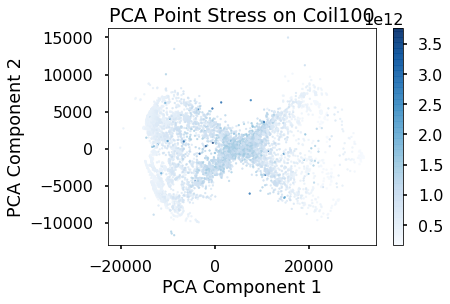

In [20]:
two_dim_label_viz(low_data, pca_point_stress, s=3, alpha=0.75)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Point Stress on Coil100");

## metric MDS and digits

If I did this correctly, the above stress function should work the same as MDS.

In [21]:
mds = MDS(n_components=2, metric=True)

This usually takes...2 mins...

In [24]:
%%time
mds_low_data = mds.fit_transform(high_data)

KeyboardInterrupt: 

In [23]:
sns.set(style='white', rc={'figure.figsize':(12,8)})
two_dim_label_viz(mds_low_data, low_labels, cmap="Spectral", s=3, alpha=0.75)

NameError: name 'mds_low_data' is not defined

In [ ]:
mds.stress_

In [ ]:
mds_diff_distances = pairwise_distance_difference(high_data, mds_low_data)

In [ ]:
(stress(mds_diff_distances))**2/2

In [ ]:
np.sqrt(mds.stress_*2)

In [ ]:
stress(mds_diff_distances)

hmmm...off by a multiple of 2...where would that come from?

In [ ]:
mds_stress = stress(mds_diff_distances)
mds_point_stress = point_stress(mds_diff_distances)

In [ ]:
two_dim_label_viz(mds_low_data, mds_point_stress, s=5, alpha=0.75)
plt.title("MDS Point Stress on Coil100");

In [ ]:
sns.distplot(mds_point_stress);

### Classical MDS
(Optimal solution is given by PCA)

$$\textstyle Strain_{D}(x_{1},x_{2},...,x_{N})={\Biggl (}{\frac {\sum _{i,j}{\bigl (}b_{ij}-\langle x_{i},x_{j}\rangle {\bigr )}^{2}}{\sum _{i,j}b_{ij}^{2}}}{\Biggr )}^{1/2}$$

where $B = -\frac{1}{2} J D^{(2)}J$ and $J = I_{N}-{\tfrac  {1}{N}}{\mathbf  {1}}{\mathbf  {1}}^{\top }$ where $\mathbf  {1}$ is the $N$-dimensional vector of 1's. 

In [ ]:
N = len(diff_distances); N

In [ ]:
I_N = np.identity(N)
one_N = np.matrix(np.ones(N)).transpose()
J = I_N - one_N * one_N.transpose()/N
B = -J * diff_distances**2 * J/2

In [ ]:
M = B - diff_distances
M = M**2
result = np.sqrt(np.sum(M)/np.sum(np.array(B)**2))

In [ ]:
result

In [ ]:
local_contributions = np.sum(np.array(M), axis=1)/np.sum(np.array(B)**2, axis=1)

In [ ]:
def strain(diff_distances):
    diff_distances = np.array(diff_distances)
    N = len(diff_distances)
    I_N = np.identity(N)
    one_N = np.matrix(np.ones(N)).transpose()
    J = I_N - one_N * one_N.transpose()/N
    B = -J * diff_distances**2 * J/2
    M = B - diff_distances
    M = np.array(M)**2 # want entry-wise squares
    return np.sqrt(np.sum(M)/np.sum(np.array(B)**2))

def point_strain(diff_distances):
    N = len(diff_distances)
    diff_distances = np.array(diff_distances)
    I_N = np.identity(N)
    one_N = np.matrix(np.ones(N)).transpose()
    J = I_N - one_N * one_N.transpose()/N
    B = -J * diff_distances**2 * J/2
    M = B - diff_distances
    M = np.array(M)**2# want entry-wise squares
    return np.sum(M, axis=1)

In [ ]:
pca_strain = strain(pca_diff_distances); pca_strain

In [ ]:
pca_point_strain = point_strain(pca_diff_distances)

In [ ]:
two_dim_label_viz(low_data, pca_point_strain)

In [ ]:
mds_strain = strain(mds_diff_distances); mds_strain

In [ ]:
mds_point_strain = point_strain(mds_diff_distances)
two_dim_label_viz(mds_low_data, mds_point_strain)

In [ ]:
## Hmmmm...now I want these to be on the same color bars

In [ ]:
data = [low_data, mds_low_data]
labels = [pca_point_stress, mds_point_stress]
titles = ['PCA', 'MDS']

In [ ]:
nrows = 1
ncols = 2
s = 15
cmap = "Blues"

fig = plt.figure(figsize=(14, 10))

grid = AxesGrid(fig, 111,
                nrows_ncols=(nrows, ncols),
                axes_pad=0.05,
                cbar_mode='single',
                cbar_location='right',
                cbar_pad=0.1
                )

for i, ax in enumerate(grid):
    ax.set_axis_off()
    im = ax.scatter(data[i][:,0], data[i][:,1], c=labels[i], cmap=cmap, s=s)
    ax.set_title(title[i])
    #im = ax.imshow(np.random.random((16,16)), vmin=0, vmax=1)

# when cbar_mode is 'single', for ax in grid, ax.cax = grid.cbar_axes[0]

cbar = ax.cax.colorbar(im)
cbar = grid.cbar_axes[0].colorbar(im)

#cbar.ax.set_yticks(np.arange(0, 1.1, 0.5))
#cbar.ax.set_yticklabels(['low', 'medium', 'high'])
plt.title("Point Stress")
plt.show()

In [ ]:
def two_dim_multiplot(data, labels, titles, cmap="Blues", s=15, **kwargs):
    ncols = 2
    nrows = int(len(data)/ncols)
    
    fig = plt.figure(figsize=(14*nrows, 5*ncols))

    grid = AxesGrid(fig, 111,
                    nrows_ncols=(nrows, ncols),
                    axes_pad=0.05,
                    cbar_mode='single',
                    cbar_location='right',
                    cbar_pad=0.1
                    )

    for i, ax in enumerate(grid):
        ax.set_axis_off()
        im = ax.scatter(data[i][:,0], data[i][:,1], c=labels[i], cmap=cmap, s=s)
        ax.set_title(titles[i])

    # when cbar_mode is 'single', for ax in grid, ax.cax = grid.cbar_axes[0]

    cbar = ax.cax.colorbar(im)
    cbar = grid.cbar_axes[0].colorbar(im);


## Comparisons 

In [ ]:
data = [low_data, mds_low_data]
labels = [low_labels, low_labels]
titles = ['PCA', 'MDS']

two_dim_multiplot(data, labels, titles, cmap="Set1")

### Stress (Metric MDS)

In [ ]:
data = [low_data, mds_low_data]
labels = [pca_point_stress, mds_point_stress]
titles = [f'PCA\n Stress: {int(pca_stress)}', f'MDS\n Stress: {int(mds_stress)}']

two_dim_multiplot(data, labels, titles)
plt.suptitle("Stress Pointwise Contribution");

### Strain (Classical MDS/PCA)

In [ ]:
width = 4
precision = 4
data = [low_data, mds_low_data]
labels = [pca_point_strain, mds_point_strain]
titles = [f'PCA\n Strain: {pca_strain:{width}.{precision}}', f'MDS\n Strain: {mds_strain:{width}.{precision}}']

two_dim_multiplot(data, labels, titles)
plt.suptitle("Strain Pointwise Contribution");